## 6.1 대회 이해
- 워싱턴 자전거 무인 대여 시스템 과거 기록 기반으로 향후 자전거 대여 수요 예측

## 6.3 탐색적 데이터 분석
- 데이터 둘러보기 -> 피처 엔지니어링 (파생 피쳐 추가) -> 데이터 시각화 -> 분석 정리 및 모델링 전략

### 6.3.2 데이터 둘러보기

In [15]:
import numpy as np
import pandas as pd

path = 'data/bike-sharing-demand/'

train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
submission = pd.read_csv(path + 'sampleSubmission.csv')

print(train.shape, test.shape)

(10886, 12) (6493, 9)


In [16]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [17]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


test 에는 없는 casual과 registered 피쳐는 훈련 데이터에서도 뺴줘야 함

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


### 6.3.3 더 효과적인 분석을 위한 피쳐 엔지니어링
- 시각화 하기 적합한 형태로 변경

In [21]:
from datetime import datetime
import calendar

# 시간 컬럼 생성
train['date'] = train['datetime'].apply(lambda x : x.split()[0])

train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2])
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

train['weekday'] = train['date'].apply(lambda x : calendar.day_name[datetime.strptime(x, "%Y-%m-%d").weekday()])

train['season'] = train['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
train['weather'] = train['weather'].map({1: 'clear', 2: 'mist, few clouds', 3: 'light snow, rain, thunderstorm', 4: 'heavy rain, thunderstorm, for'})

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,spring,0,0,clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,spring,0,0,clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,spring,0,0,clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,spring,0,0,clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,spring,0,0,clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


In [22]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,spring,0,0,clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,spring,0,0,clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,spring,0,0,clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,spring,0,0,clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,spring,0,0,clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


- date는 year, month, day에도 있으므로 추후 제거
- 세달 씩 month를 묶으면 season : 지나치게 세분화 된 피쳐를 더 큰 분류로 묶으면 성능이 좋아지는 경우가 있어, season만 남기고 month는 제거

### 6.3.4 데이터 시각화

In [31]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

분포도 : 타깃값의 분포를 파악하여, 타깃값을 그대로 사용할지 변환할지 파악

=> 분포가 왼쪽으로 편향되어 있으므로, 정규분포에 가깝게 만들기 위해 로그 변환, 마지막에 지수변환하여 count 복원 필요


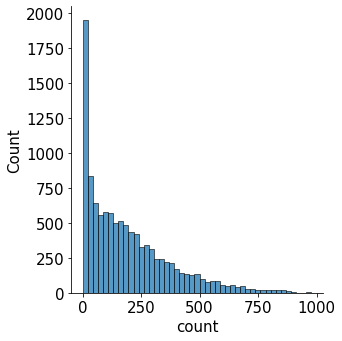

In [32]:
mpl.rc('font', size=15)
sns.displot(train['count']);

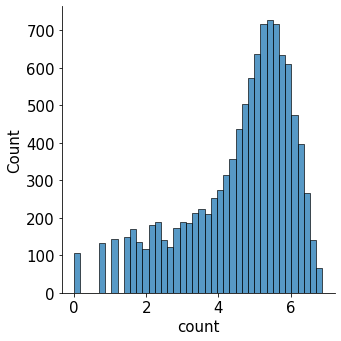

In [33]:
sns.displot(np.log(train['count']));

막대 그래프
- 각 범주형 데이터에 따라 평균 대여 수량이 어떻게 다른지 파악, 중요한 피쳐 파악
1) 연도별 평균 대여 수량 : 11년 < 12년
2) 월별 평균 대여 수량 : 날씨가 따듯할 수록 대여 많음
3) 일별 평균 대여 수량 : train에 1~19, test 20~ 데이터 있어서 피쳐로 사용 불가능, 공통된값이 없음 => day 피쳐 제거
4) 시간별 평균 대여 수량 : 등,하교 & 출퇴근
5) 분, 초별에는 데이터 없음 : 모두 0 => minute, second 제거

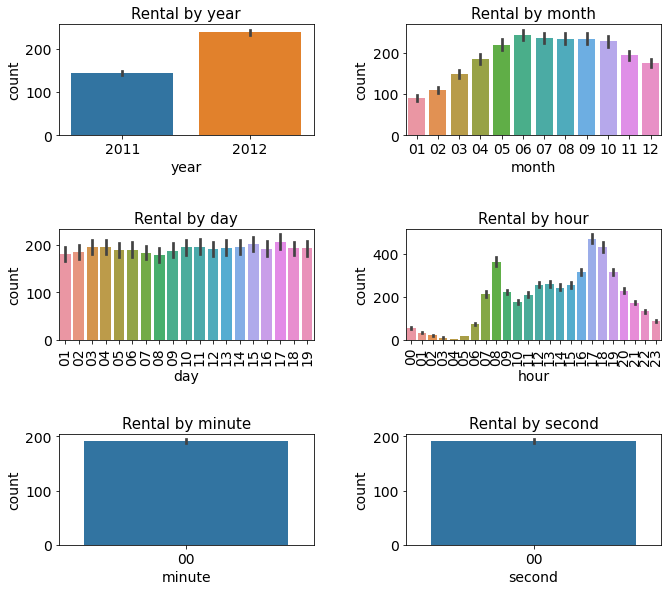

In [37]:
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=15)
figure, axes = plt.subplots(nrows=3, ncols=2)
plt.tight_layout()
figure.set_size_inches(10,9)

sns.barplot(x='year', y='count', data=train, ax=axes[0,0]);
sns.barplot(x='month', y='count', data=train, ax=axes[0,1]);
sns.barplot(x='day', y='count', data=train, ax=axes[1,0]);
sns.barplot(x='hour', y='count', data=train, ax=axes[1,1]);
sns.barplot(x='minute', y='count', data=train, ax=axes[2,0]);
sns.barplot(x='second', y='count', data=train, ax=axes[2,1]);

axes[0,0].set(title='Rental by year')
axes[0,1].set(title='Rental by month')
axes[1,0].set(title='Rental by day')
axes[1,1].set(title='Rental by hour')
axes[2,0].set(title='Rental by minute')
axes[2,1].set(title='Rental by second')

axes[1,0].tick_params(axis='x', labelrotation=90)
axes[1,1].tick_params(axis='x', labelrotation=90)

박스플롯
- 범주형 데이터에 따른 수치형 정보 데이터

1) 봄에 수량이 가장 적고 가을에 가장 많음
2) 날씨가 좋을 때 수량이 많음
3) 공휴일 유무는 중앙값은 비슷하나, 공휴일이 아닐 때 이상치가 많음
4) 근무일 일 때, 이상치가 많음


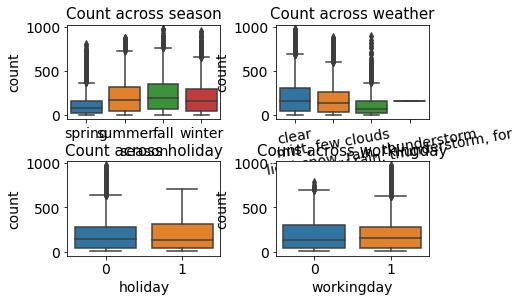

In [41]:
figures, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(10,10)

sns.boxplot(x='season', y='count', data=train, ax=axes[0,0]);
sns.boxplot(x='weather', y='count', data=train, ax=axes[0,1]);
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1,0]);
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1,1]);

axes[0,0].set(title='Count across season')
axes[0,1].set(title='Count across weather')
axes[1,0].set(title='Count across holiday')
axes[1,1].set(title='Count across workingday')

axes[0,1].tick_params(axis='x', labelrotation=10)

포인트 플롯
- 범주형 데이터에 따른 수치형 데이터의 평균과 신뢰구간
- 근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량
1) 근무일에는 출퇴근 시간, 쉬는 날에는 오후 12~2시
2) 대여 수량은 가을에 가장 많고 봄에 가장 적음
3) 날씨가 좋을 때 대여량이 가장 많음 (폭우, 폭설시에 18시 대여 건수가 있는데 정말 급한 일이 있었을 수도? 이상치는 제거 고려)

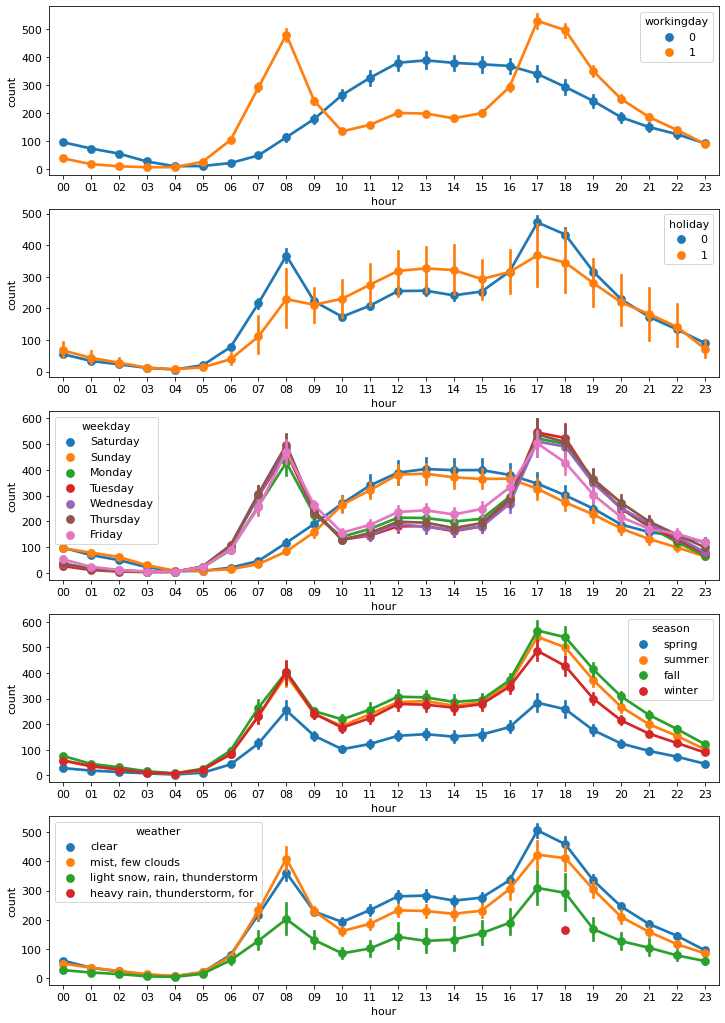

In [42]:
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=5)
figure.set_size_inches(12,18)

sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0]);
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1]);
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[2]);
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[3]);
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[4]);


회귀선 포함 산점도
- 수치형 데이터 간의 상관관계
- 수치형 데이터 온도, 체감온도, 풍속, 습도별 대여수량

1) 온도, 체감온도가 높을 수록 & 습도가 낮을 수록 대여 많음
2) 풍속이 셀 수록 대여 많음 : windspeed에 결측값이 많아서 => 실제 관측치가 없거나 오류로 인해 0으로 기록 됐을 가능성이 높음, 다른 값으로 대체하거나 피쳐삭제 필요

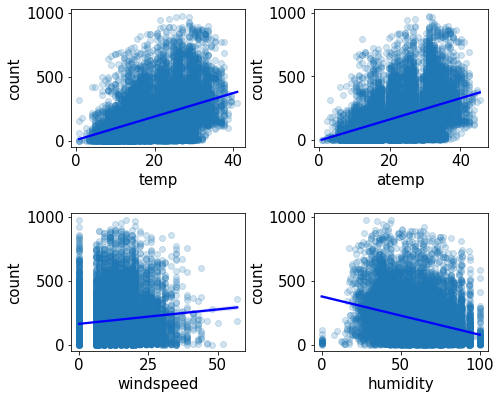

In [44]:
mpl.rc('font', size=15)
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(7,6)

sns.regplot(x='temp', y='count', data=train, ax=axes[0,0], scatter_kws={'alpha':0.2}, line_kws={'color':'blue'});
sns.regplot(x='atemp', y='count', data=train, ax=axes[0,1], scatter_kws={'alpha':0.2}, line_kws={'color':'blue'});
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1,0], scatter_kws={'alpha':0.2}, line_kws={'color':'blue'});
sns.regplot(x='humidity', y='count', data=train, ax=axes[1,1], scatter_kws={'alpha':0.2}, line_kws={'color':'blue'});

히트맵
- 수치형 데이터끼리 상관관계

1) 온도가 높을수록, 습도가 낮을수록 대여수량 많음
2) 풍속과는 관계 없음

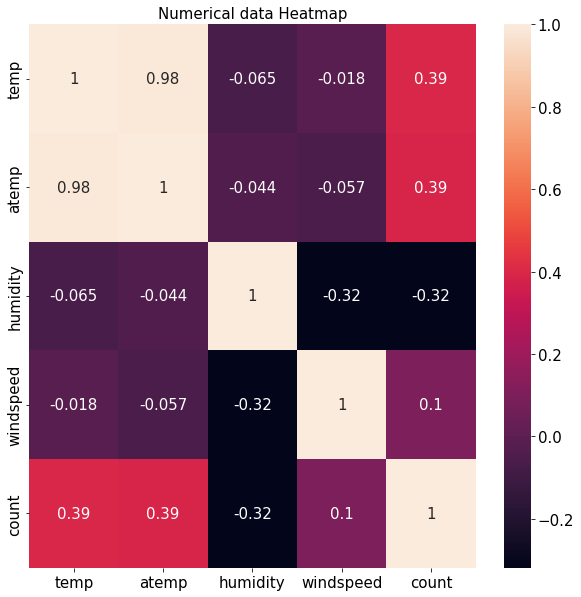

In [46]:
corr = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corr, annot=True)
ax.set(title='Numerical data Heatmap');

## 6.4 베이스라인 모델

### 6.4.1 피처 엔지니어링
- 이상치는 합치기 전에 지워야 함 : 훈련데이터에서 weather가 4인 데이터 삭제
- 피쳐 엔지니어링전에 두 데이터를 합쳐주었다가 끝나면 도로 나눔
- 파생 변수 추가
- 필요없는 피쳐 제거 : 테스트 데이터에 없는 훈련 데이터 피쳐 & 분석 후 제거할 피쳐
- 피쳐 선택 : 탐색적 분석, 피쳐 중요도, 상관관계 등을 활용해 종합적으로 판단


In [59]:
# 이상치 삭제
import pandas as pd
path = 'data/bike-sharing-demand/'

train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
submission = pd.read_csv(path + 'sampleSubmission.csv')

train = train.loc[train['weather'] != 4]

In [60]:
# 데이터 합치기
all_data = pd.concat([train, test], ignore_index=True)
all_data.shape

(17378, 12)

In [61]:
# 파생변수 추가

from datetime import datetime

all_data['date'] = all_data['datetime'].apply(lambda x: x.split()[0])
all_data['year'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[0])
all_data['month'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[1])
all_data['hour'] = all_data['datetime'].apply(lambda x: x.split()[1].split(':')[0])
all_data['weekday'] = all_data['date'].apply(lambda date_str : datetime.strptime(date_str, "%Y-%m-%d").weekday())

In [62]:
# 필요없는 피쳐 제거
drop_features = ['casual', 'registered', 'datetime', 'date', 'windspeed','month']

all_data = all_data.drop(drop_features, axis=1)

In [63]:
# 데이터 나누기
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]

X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)

y = train['count']

X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,2011,00,5
1,1,0,0,1,9.02,13.635,80,2011,01,5
2,1,0,0,1,9.02,13.635,80,2011,02,5
3,1,0,0,1,9.84,14.395,75,2011,03,5
4,1,0,0,1,9.84,14.395,75,2011,04,5


### 6.4.2 평가지표 계산함수 작성
- 타깃값으로 count가 아닌 log(count)를 사용할 것이므로 지수변화를 하여 상용하도록
- y값이 굉장히 작다면 np.log1p(y)를 사용하기도 함

In [64]:
import numpy as np

def rmsle(y_true, y_pred, convert_exp=True):
    if convert_exp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
        
    # 로그 변환 후, 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))
    
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    
    return output

### 6.4.3 모델 훈련
- 훈련 전에 타깃값을 로그변환

In [66]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

log_y = np.log(y)
linear_reg_model.fit(X_train, log_y)

preds = linear_reg_model.predict(X_train)
print(rmsle(log_y, preds, True))

1.020498018930501


### 6.4.5 예측 및 결과 제출
- 테스트 데이터로 예측한 결과 이용
- 예측한 값에 지수변환 필요 (현재 예측값은 count아닌 log(count)이므로)

In [67]:
linear_reg_preds = linear_reg_model.predict(X_test)

submission['count'] = np.exp(linear_reg_preds)
submission.to_csv('submission.csv', index=False)

## 6.5 성능 개선 : 릿지 회귀
- 릿지 회귀 : L2규제 적용 선형 회귀 모델
### 6.5.1 하이퍼파라미터 최적화
- 하이퍼 파라미터를 적용한 모델마다 교차검증하며 성능을 측정

In [70]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model = Ridge()

ridge_params = {'max_iter' : [3000],
               'alpha' : [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300,
                         400, 800, 900, 1000]
               }

rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

gridsearch_ridge_model = GridSearchCV(estimator=ridge_model, param_grid=ridge_params, scoring=rmsle_scorer, cv=5)

log_y = np.log(y)
gridsearch_ridge_model.fit(X_train, log_y)

print(gridsearch_ridge_model.best_params_)

{'alpha': 0.1, 'max_iter': 3000}


### 6.5.2 성능 검증

In [71]:
preds = gridsearch_ridge_model.best_estimator_.predict(X_train)

print(rmsle(log_y, preds, True))

1.020497980747178


## 6.6 성능 개선 : 라쏘 회귀모델

In [72]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()

lasso_alpha = 1/np.array([0.1, 1,2,3,4,10,30,100,200,300,400,800,900,1000])
lasso_params = {'max_iter':[3000], 'alpha':lasso_alpha}

gridsearch_lasso_model = GridSearchCV(estimator=lasso_model, param_grid=lasso_params, scoring=rmsle_scorer, cv=5)

log_y = np.log(y)
gridsearch_lasso_model.fit(X_train, log_y)

print(gridsearch_lasso_model.best_params_)

{'alpha': 0.00125, 'max_iter': 3000}


In [73]:
preds = gridsearch_lasso_model.best_estimator_.predict(X_train)

print(rmsle(log_y, preds, True))

1.0204881139761892


## 6.7 성능 개선: 랜덤 포레스트

In [74]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()

rf_params = {'random_state':[42], 'n_estimators':[100,120,140]}
gridsearch_rf_model = GridSearchCV(estimator=rf_model, param_grid=rf_params, scoring=rmsle_scorer, cv=5)

log_y = np.log(y)
gridsearch_rf_model.fit(X_train, log_y)

print(gridsearch_rf_model.best_params_)

{'n_estimators': 140, 'random_state': 42}


In [75]:
preds = gridsearch_rf_model.best_estimator_.predict(X_train)

print(rmsle(log_y, preds, True))

0.11265875245404895


두 훈련, 테스트 데이터셋의 분포가 비슷하면, 과대적합의 문제가 상대적으로 적음

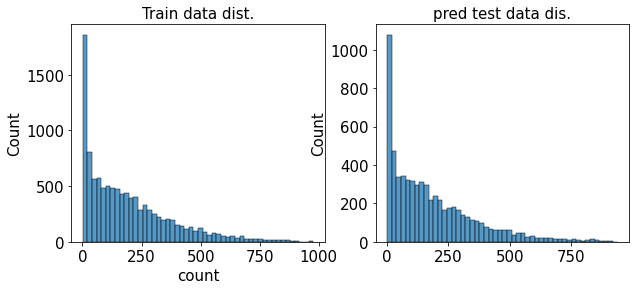

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

rf_preds = gridsearch_rf_model.best_estimator_.predict(X_test)

figure, axes = plt.subplots(1,2)
figure.set_size_inches(10,4)

sns.histplot(y, bins=50, ax=axes[0])
axes[0].set_title('Train data dist.');
sns.histplot(np.exp(rf_preds), bins=50, ax=axes[1])
axes[1].set_title('pred test data dis.');

In [79]:
submission['count'] = np.exp(rf_preds)
submission.to_csv('submission.csv', index=False)

# 핵심 요약
1. 캐글 경진대회 : 경진대회 이해 -> 탐색적 데이터 분석 -> 베이스라인 모델 -> 성능개선
2. 타깃값이 정규분포에 가까울 수록 회귀 모델의 성능이 좋다. 한쪽으로 치우친 타깃값은 로그변환하면 정규분포에 가까워지고, 결과값을 지수변환하면 원래 타깃값 형태로 복원됨
3. 훈련데이터에서 이상치를 제거하면 일반화 성능이 높아질 수 있습니다.
4. 기존 피쳐를 분해/조합하여 모델링에 도운되는 새로운 피쳐 추가 가능
5. 불필요한 피쳐를 제거하면 성능도 좋아지고 훈련 속도도 빨라짐